<h1> Evolutionary algorithm for TSP problem <h1>
<br>
Daniel Jankowski 2021

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import math

In [3]:
class Problem:
    def random_solution(self):
        return []
    
    def evaluate(self, s):
        return 0.0
    
    def mutate(self, s):
        return s[:]
    
    def crossover(self, s1, s2):
        return s1[:]
    def display_solution_param(self, s):
        print(s)

In [4]:
class TSP(Problem):
    cities = 0
    distances = []
    locations = []
    
    def __init__(self, cities, city_coords=None, seed=1):
        
        random.seed(seed)
        self.cities = cities
        
        self.locations = []
        if city_coords is None:
            for i in range(cities):
                self.locations.append((random.random(), random.random()))
        else:
            for i in range(cities):
                self.locations.append(city_coords[i])
        
        self.distances = []
        for i in range(cities):
            self.distances.append([])
            for j in range(cities):
                self.distances[i].append(self.distance(i, j))
                
    def distance(self, c1, c2):
        # euclidean distance between two points on a map
        
        loc1, loc2 = self.locations[c1], self.locations[c2]
        return math.sqrt((loc1[0]-loc2[0])**2 + (loc1[1]-loc2[1])**2)
    
    def random_solution(self):
        # we return a random permutation of numbers, which corresponds to a random order of visiting cities
        
        s = [i for i in range(self.cities)]
        random.shuffle(s)
        return s
    
    def evaluate(self, s):
        
        fit = 0
        for i in range(len(s)):
            fit += self.distances[s[i]][s[i+1 if i+1<len(s) else 0]]
        return fit
    
    def mutate(self, s):

        sol = s[:]
        c1, c2 = random.sample(range(0, self.cities), 2)
        if c1 < c2:
            rev = sol[c1:c2+1]
            rev.reverse()
            sol[c1:c2+1] = rev
        else:
            rev = sol[c1:] + sol[:c2+1]
            rev.reverse()
            sol[:(c2+1)] = rev[-(c2+1):]
            sol[c1:] = rev[:-(c2+1)]
        return sol
    
    def crossover(self, s1, s2):
        
        sol1, sol2 = s1[:], s2[:]
        c1, c2 = random.sample(range(0, self.cities), 2)
        if c2 < c1:
            ctmp = c1
            c1 = c2
            c2 = ctmp
        sol1[c1:c2+1] = list(filter(lambda x: x in sol1[c1:c2+1], s2))
        sol2[c1:c2+1] = list(filter(lambda x: x in sol2[c1:c2+1], s1))
        
        return sol1, sol2
    
    def display_solution(self, solution):
        fig, ax = plt.subplots(figsize=(8, 8))

        x = [i[1] for i in [self.locations[c] for c in solution]]
        y = [i[0] for i in [self.locations[c] for c in solution]]
        x.append(x[0])
        y.append(y[0])
        line, = ax.plot(x, y, 'go-',linewidth=2)
            
        plt.xlim((-0.03,1.03))
        plt.ylim((-0.03,1.03))
        plt.show()

In [5]:
class TSP_Poland(TSP):

    def dist(self, x1, y1, x2, y2):
        return ((x1-x2)**2+(y1-y2)**2)**(1/2)

    def __init__(self, seed=1):
        city_names = ["Poznan", "Wroclaw", "Krakow", "Warszawa", "Gdansk", "Katowice", "Lodz",
                       "Bialystok", "Rzeszow", "Szczecin", "Lublin", "Olsztyn", "Kielce", "Gdynia", "Bydgoszcz", "Zakopane"]
        city_coords = {
            "Poznan": (52.409538, 16.931992),
            "Wroclaw": (51.107883, 17.038538),
            "Krakow": (50.049683, 19.944544),
            "Warszawa": (52.237049, 21.017532),
            "Gdansk": (54.372158, 18.638306),
            "Katowice": (50.270908, 19.039993),
            "Lodz": (51.759445, 19.457216),
            "Bialystok": (53.13333, 23.16433),
            "Rzeszow": (50.041187, 21.999121),
            "Szczecin": (53.42894, 14.55302),
            "Lublin": (51.25, 22.56667),
            "Olsztyn": (53.77995, 20.49416),
            "Kielce": (50.87033, 20.62752),
            "Gdynia": (54.51889, 18.53188),
            "Bydgoszcz": (53.1235, 18.00762),
            "Zakopane": (49.29899, 19.94885)
        }      
        super().__init__(len(city_names), [city_coords[city] for city in city_names], seed)

    def force_aspect(self, ax, aspect=1):
        im = ax.get_images()
        extent =  im[0].get_extent()
        ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)
        
        
    def display_solution(self, solution):
        self.display_solution_param(solution, True, [11.328361, 27.045778], [49.0025, 54.835778])
        
    def display_solution_param(self, solution, show_map, xlim, ylim):
        fig, ax = plt.subplots(figsize=(8, 8))
        
        if show_map:
            datafile = 'polska.png'
            img = mpimg.imread(datafile)
            plt.imshow(img, zorder=0, extent=[14.245, 24.129139, 49.0025, 54.835778])

        x = [i[1] for i in [self.locations[c] for c in solution]]
        y = [i[0] for i in [self.locations[c] for c in solution]]
        x.append(x[0])
        y.append(y[0])
        line, = ax.plot(x, y, 'go-',linewidth=2)

        if show_map:
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            self.force_aspect(ax)
            
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.show()

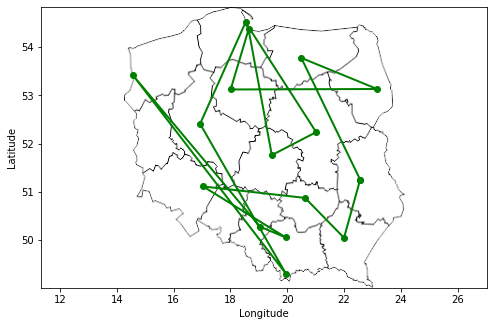

[10, 8, 12, 1, 2, 5, 9, 15, 0, 13, 3, 6, 4, 14, 7, 11]
[2, 1, 12, 8, 10, 5, 9, 15, 0, 13, 3, 6, 4, 14, 7, 11]


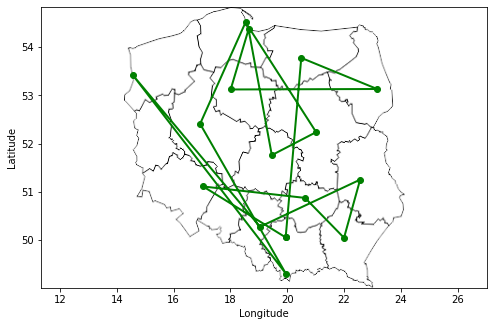

[10, 8, 12, 1, 2, 5, 9, 15, 0, 14, 4, 6, 3, 13, 7, 11]


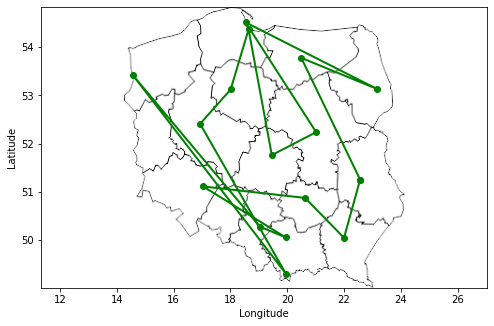

[10, 8, 12, 1, 2, 5, 9, 15, 0, 13, 11, 7, 14, 4, 6, 3]


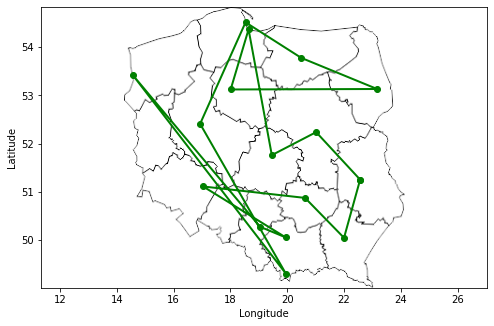

In [9]:
tsp = TSP_Poland(16)
rand_route = tsp.random_solution()
tsp.display_solution(rand_route)
print(rand_route)
for i in range(3):
    mutated_route = tsp.mutate(rand_route)
    print(mutated_route)
    tsp.display_solution(mutated_route)


In [109]:
import numpy as np
import pandas as pd

In [110]:
best_fitness_avg_10k = []
tsp = TSP_Poland(16)
avg1 = []
for j in range(10):
    rand_route = tsp.random_solution()
    quality = tsp.evaluate(rand_route)
    best_sol = quality
    #best_sol_route = rand_route
    for i in range(9999):
        rand_route = tsp.random_solution()
        quality = tsp.evaluate(rand_route)
        if quality < best_sol:
            best_sol = quality
    best_fitness_avg_10k.append(best_sol)
avg1.append(np.mean(best_fitness_avg_10k))
best_fitness_avg_1k = []
for j in range(10):
    rand_route = tsp.random_solution()
    quality = tsp.evaluate(rand_route)
    best_sol = quality
    #best_sol_route = rand_route
    for i in range(999):
        rand_route = tsp.random_solution()
        quality = tsp.evaluate(rand_route)
        if quality < best_sol:
            best_sol = quality
    best_fitness_avg_1k.append(best_sol)
avg1.append(np.mean(best_fitness_avg_10k))
best_fitness_avg_100 = []
for j in range(10):
    rand_route = tsp.random_solution()
    quality = tsp.evaluate(rand_route)
    best_sol = quality
    #best_sol_route = rand_route
    for i in range(99):
        rand_route = tsp.random_solution()
        quality = tsp.evaluate(rand_route)
        if quality < best_sol:
            best_sol = quality
    best_fitness_avg_100.append(best_sol)
avg1.append(np.mean(best_fitness_avg_100))
best_fitness_avg_10 = []
for j in range(10):
    rand_route = tsp.random_solution()
    quality = tsp.evaluate(rand_route)
    best_sol = quality
    #best_sol_route = rand_route
    for i in range(9):
        rand_route = tsp.random_solution()
        quality = tsp.evaluate(rand_route)
        if quality < best_sol:
            best_sol = quality
    best_fitness_avg_10.append(best_sol)
avg1.append(np.mean(best_fitness_avg_10))
#TSP_Poland(TSP).display_solution(best_sol_route)
numbers = [10000,1000,100,10]

data1 = {
    'Number of evaluations':numbers,
    'AVG fitness':avg1
}
data1 = pd.DataFrame(data1, columns=['Number of evaluations','AVG fitness'])
data1

,Number of evaluations,AVG fitness
0,10000,37.998611
1,1000,37.998611
2,100,44.458619
3,10,48.227344


In [111]:
#Initial population
def TournamentWinners(population, n, t):
    new_pool = []
    for i in range(n):
        np.random.shuffle(population)
        tournament = population[:t]
        tournament.sort(reverse = False)
        new_pool.append(tournament[0])
    return new_pool

def step(tsp, population, n, pm, pc):
    new_pool = []
    for i in range(n):
        if np.random.random() < pm:
            mutated = tsp.mutate(population[i][1])
            add = [tsp.evaluate(mutated),mutated]
            new_pool.append(add)
        if np.random.random() < pc:
            p1 = population[np.random.randint(n)][1]
            p2 = population[np.random.randint(n)][1]
            child1, child2 = tsp.crossover(p1,p2)
            add = [tsp.evaluate(child1),child1]
            add1 = [tsp.evaluate(child2),child2]
            new_pool.append(add)
            new_pool.append(add1)
    return new_pool+population
n = 20
population = [[] for x in range(n)]
tsp = TSP_Poland(16)
pm = 0.6
pc = 0.2
t = 3
#initial population
for i in range(n):
    sol = tsp.random_solution()
    population[i].append(tsp.evaluate(sol))
    population[i].append(sol)
#print(population)
#print("##")
best_sol = []
avg2 = []
for m in range(10):
    population1 = population #get original initial population
    for p in range(10):
        new_population = TournamentWinners(step(tsp, population1, n, pm, pc), n, t)
        population1 = new_population
    population1.sort(reverse = False)
    #print(population1[:5])
    #print(population1[0][0])
    best_sol.append(population1[0][0])
avg2.append(np.mean(best_sol))
best_sol = []
for m in range(10):
    population1 = population #get original initial population
    no_improvement = 0
    new_population = TournamentWinners(step(tsp, population1, n, pm, pc), n, t)
    population1 = new_population
    new_population.sort(reverse = False)
    best = new_population[0]
    for p in range(99):
        new_population = TournamentWinners(step(tsp, population1, n, pm, pc), n, t)
        population1 = new_population
        new_population.sort(reverse = False)
        if best == new_population[0]:
            no_improvement+=1
        else:
            no_improvement = 0
        if no_improvement == 50:
            break
    population1.sort(reverse = False)
    #print(population1[:5])
    #print(population1[0][0])
    best_sol.append(population1[0][0])
avg2.append(np.mean(best_sol))
best_sol = []
for m in range(10):
    population1 = population #get original initial population
    no_improvement = 0
    new_population = TournamentWinners(step(tsp, population1, n, pm, pc), n, t)
    population1 = new_population
    new_population.sort(reverse = False)
    best = new_population[0]
    for p in range(999):
        new_population = TournamentWinners(step(tsp, population1, n, pm, pc), n, t)
        population1 = new_population
        new_population.sort(reverse = False)
        if best == new_population[0]:
            no_improvement+=1
        else:
            no_improvement = 0
        if no_improvement == 50:
            break
    population1.sort(reverse = False)
    #print(population1[:5])
    #print(population1[0][0])
    best_sol.append(population1[0][0])
avg2.append(np.mean(best_sol))
best_sol = []
for m in range(10):
    population1 = population #get original initial population
    no_improvement = 0
    new_population = TournamentWinners(step(tsp, population1, n, pm, pc), n, t)
    population1 = new_population
    new_population.sort(reverse = False)
    best = new_population[0]
    for p in range(9999):
        new_population = TournamentWinners(step(tsp, population1, n, pm, pc), n, t)
        population1 = new_population
        new_population.sort(reverse = False)
        if best == new_population[0]:
            no_improvement+=1
        else:
            no_improvement = 0
        if no_improvement == 50:
            break
    population1.sort(reverse = False)
    #print(population1[:5])
    #print(population1[0][0])
    best_sol.append(population1[0][0])
avg2.append(np.mean(best_sol))
numbers = [10,100,1000,10000]

data1 = {
    'Number of evaluations':numbers,
    'AVG fitness':avg2
}
data1 = pd.DataFrame(data1, columns=['Number of evaluations','AVG fitness'])
data1

,Number of evaluations,AVG fitness
0,10,37.144161
1,100,27.824969
2,1000,27.633055
3,10000,27.058962


Main difference between random search and evolution is that random search based on how lucky/unlucky algorithm is. We can get situation when our algorithm randomly find very good/bad solution and we dont have impact on this. In case of evolution we are always sure that algorithm will improve solution (sometimes better, sometimes worse, but anyway it will proceed). In evolution method somehow we eliminate randomness of results. Proof of this we can see above - with increasing a number of generations algorithm finds better solutions. 

In [108]:
import pandas as pd
population_size = [20, 50, 100]
ts = [3, 5, 10]
pms = [0.2, 0.4, 0.6]
pcs = [0.2, 0.4, 0.6]
results = []
avg = []
def GetInitialPopulation(tsp, n):
    population = [[]for x in range(n)]
    for i in range(n):
        sol = tsp.random_solution()
        population[i].append(tsp.evaluate(sol))
        population[i].append(sol)
    return population
#below I perform evolution for different parameters. In every case number of generations = 500 run over 10 times
for n in population_size:
    population2 = GetInitialPopulation(tsp,n)
    for t in ts:
        for pm in pms:
            #result = []
            for pc in pcs:
                avg_of_10 = []
                for x in range(10):
                        new_population = TournamentWinners(step(tsp, population2, n, pm, pc), n, t)
                        population2 = new_population
                        new_population.sort(reverse = False)
                        best = new_population[0][0]
                        no_improve = 0
                        for i in range(499):
                            new_population = TournamentWinners(step(tsp, population2, n, pm, pc), n, t)
                            population2 = new_population
                            new_population.sort(reverse = False)
                            if new_population[0][0] == best:
                                no_improve+=1
                            if no_improve==50:
                                break
                        population2.sort(reverse = False)
                        avg_of_10.append(population2[0][0])
                avg.append(np.mean(avg_of_10))
population_size = [20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]
ts = [3,3,3,3,3,3,3,3,3,5,5,5,5,5,5,5,5,5,10,10,10,10,10,10,10,10,10,3,3,3,3,3,3,3,3,3,5,5,5,5,5,5,5,5,5,10,10,10,10,10,10,10,10,10,3,3,3,3,3,3,3,3,3,5,5,5,5,5,5,5,5,5,10,10,10,10,10,10,10,10,10]
pms = [0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6,0.2,0.2,0.2,0.4,0.4,0.4,0.6,0.6,0.6]
pcs = [0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6,0.2,0.4,0.6]
data = {
    'Population size':population_size,
    'Tournament size':ts,
    'Probability mutation':pms,
    'Probability crossover':pcs,
    'AVG':avg
}
data = pd.DataFrame(data, columns=['Population size', 'Tournament size', 'Probability mutation', 'Probability crossover','AVG'])
data.head(20)
data.sort_values(by=['AVG'])
        
    
    

,Population size,Tournament size,Probability mutation,Probability crossover,AVG
40,50,5,0.4,0.4,26.969402
58,100,3,0.4,0.4,26.969402
53,50,10,0.6,0.6,26.969402
52,50,10,0.6,0.4,26.969402
51,50,10,0.6,0.2,26.969402
...,...,...,...,...,...
0,20,3,0.2,0.2,27.361588
57,100,3,0.4,0.2,27.651481
56,100,3,0.2,0.6,27.651481
55,100,3,0.2,0.4,27.651481


I've checked average fitness for every combination of parameters. I run every case over 10 times for number of generations = 500. Results are visible above. The best average fitness is for population size 50 or 100 with probability mutation/crossover = 0.4. Interesting fuct is that there was some cases with the best fitness, where tournament size was equal 10.